In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(337, 398, 3)


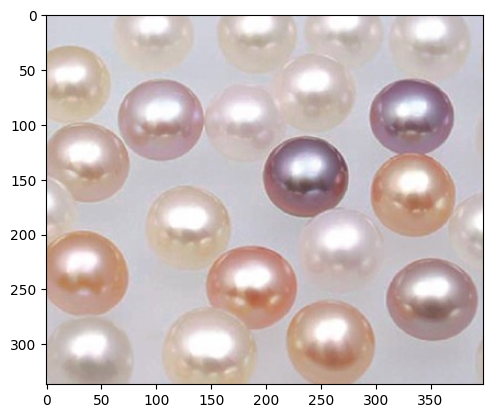

In [5]:
img = cv2.imread('./2-1.jpg',1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(np.shape(img))
plt.imshow(img)

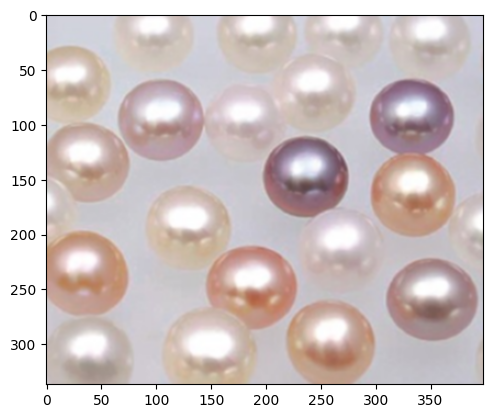

In [6]:
#对图像进行高斯模糊
img2 = cv2.GaussianBlur(img,(3,3),1)
plt.imshow(img2)

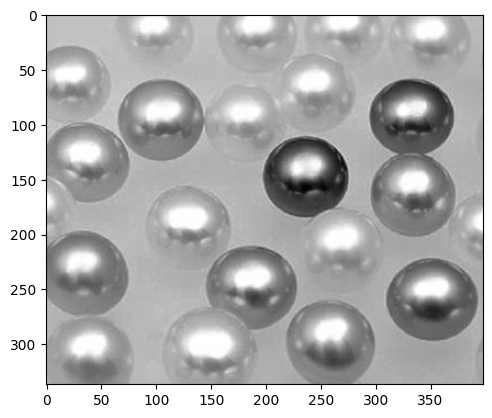

In [10]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

(0.0, 256.0)

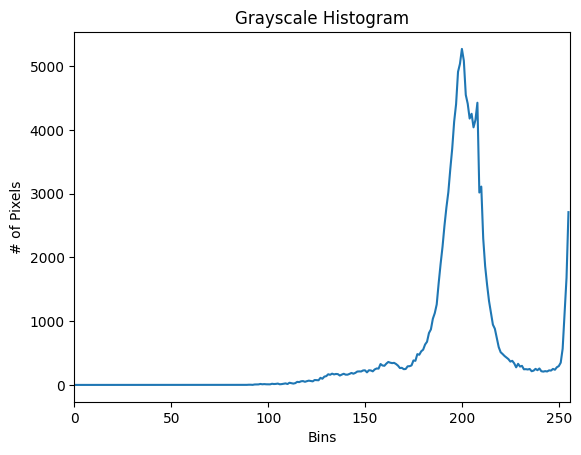

In [11]:
#绘制灰度直方图
hist1 = cv2.calcHist([img],[0],None,[256],[0,256])
plt.figure()#新建一个图像
plt.title("Grayscale Histogram")#图像的标题
plt.xlabel("Bins")#X轴标签
plt.ylabel("# of Pixels")#Y轴标签
plt.plot(hist1)#画图
plt.xlim([0,256])#设置x坐标轴范围

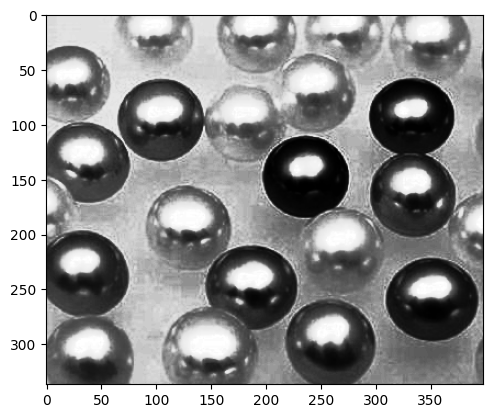

In [14]:
#对直方图进行均衡化
equ = cv2.equalizeHist(gray)
plt.imshow(equ, cmap='gray')

(0.0, 256.0)

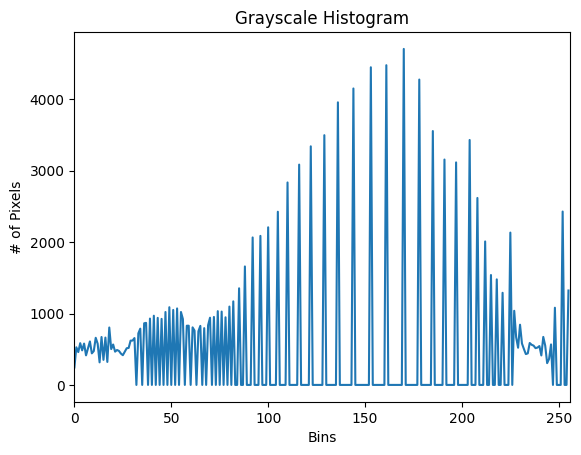

In [13]:
#绘制灰度均衡化以后的直方图
hist2 = cv2.calcHist([equ],[0],None,[256],[0,256])
plt.figure()#新建一个图像
plt.title("Grayscale Histogram")#图像的标题
plt.xlabel("Bins")#X轴标签
plt.ylabel("# of Pixels")#Y轴标签
plt.plot(hist2)#画图
plt.xlim([0,256])#设置x坐标轴范围

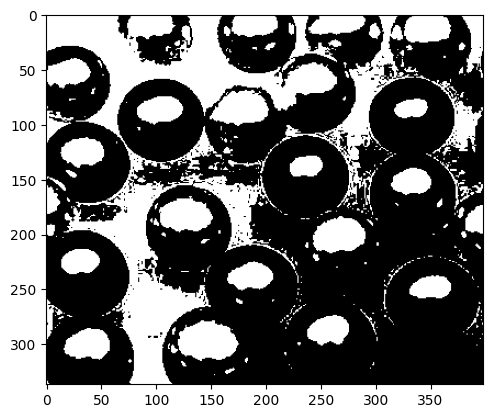

In [17]:
#对图像进行二值化处理
ret,img1 = cv2.threshold(gray,200,255,cv2.THRESH_BINARY)
plt.imshow(img1, cmap='gray')

In [18]:
#对图像进行检测边缘
edges1 = cv2.Canny(img2, 10, 80, apertureSize = 3,L2gradient=True)
#edges2 = cv2.Canny(img, 10, 80, apertureSize = 3)
circles1 = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,
55,param1=100,param2=25,minRadius=20,maxRadius=60)
print(circles1)
circles = circles1[0,:,:]#提取为二维
print(circles)
circles = np.uint16(np.around(circles))#四舍五入，取整
for i in circles[:]:
    cv2.circle(img,(i[0],i[1]),i[2],(255,0,0),2)#画圆
    cv2.circle(img,(i[0],i[1]),2,(255,0,255),5)#画圆心

[[[104.5  94.5  39. ]
  [328.5  93.5  34.2]
  [332.5 163.5  38. ]
  [235.5 149.5  38.9]
  [186.5 254.5  43.6]
  [257.5 300.5  40.8]
  [ 35.5 237.5  38.5]
  [351.5 263.5  41.6]
  [ 39.5 134.5  36.6]
  [129.5 196.5  40.2]]]
[[104.5  94.5  39. ]
 [328.5  93.5  34.2]
 [332.5 163.5  38. ]
 [235.5 149.5  38.9]
 [186.5 254.5  43.6]
 [257.5 300.5  40.8]
 [ 35.5 237.5  38.5]
 [351.5 263.5  41.6]
 [ 39.5 134.5  36.6]
 [129.5 196.5  40.2]]


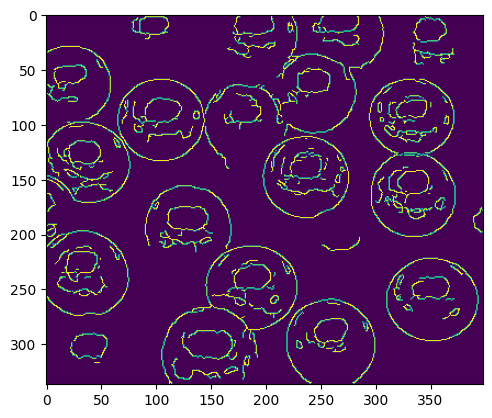

In [19]:
plt.imshow(edges1)